In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder



In [78]:
filelocation = '../uas_ml/dataset/dataset_hijab.xlsx'
df_jual = pd.read_excel(filelocation, sheet_name='laporan penjualan', skiprows=3)

In [79]:
df_jual = df_jual.rename(columns={
    'NO': 'NO',
    'TANGGAL': 'TANGGAL',
    'KODE': 'KODE',
    'NAMA BARANG': 'NAMA BARANG',
    'KATEGORI': 'KATEGORI',
    'DESAIN': 'DESAIN',
    'HARGA JUAL': 'HARGA JUAL',
    'HARGA BELI': 'HARGA BELI',
    'LABA': 'LABA'
})

In [80]:
df_jual = df_jual.dropna(subset=['NO'])

In [81]:
df_jual['TANGGAL'] = pd.to_datetime(df_jual['TANGGAL'])
df_jual['BULAN'] = df_jual['TANGGAL'].dt.month

In [82]:
df_laris = df_jual.groupby(['KODE', 'NAMA BARANG']).size().reset_index(name='COUNT')
df_laris = df_laris.sort_values(by='COUNT', ascending=False)

In [83]:
df_laris

,KODE,NAMA BARANG,COUNT
35,H-30,SEGITIGA DIAMOND,46
0,A-01,PENITI,37
1,A-02,CHIPUT,37
24,H-18,BERGO INSTAN VOAL,36
7,H-01,PASMINA OVAL,32
27,H-21,SEGIEMPAT VOAL,27
17,H-11,PASMINA VOAL,22
32,H-27,SEGITIGA VOAL,15
15,H-09,PASMINA SNOWCHIFFON,14
25,H-19,BERGO INSTAN CREPE,13


In [84]:
top_10_laris = df_laris.head(10)
print("Top 10 Barang Terlaris:")
print(top_10_laris)

Top 10 Barang Terlaris:
    KODE          NAMA BARANG  COUNT
35  H-30     SEGITIGA DIAMOND     46
0   A-01               PENITI     37
1   A-02               CHIPUT     37
24  H-18    BERGO INSTAN VOAL     36
7   H-01         PASMINA OVAL     32
27  H-21       SEGIEMPAT VOAL     27
17  H-11        PASMINA VOAL      22
32  H-27        SEGITIGA VOAL     15
15  H-09  PASMINA SNOWCHIFFON     14
25  H-19   BERGO INSTAN CREPE     13


In [85]:
print("\nDeskripsi Data:")
print(df_jual.describe())


Deskripsi Data:
               NO                        TANGGAL     HARGA JUAL  \
count  469.000000                            469     469.000000   
mean   235.000000  2024-02-08 06:36:04.605543680   61731.343284   
min      1.000000            2024-02-01 00:00:00    4000.000000   
25%    118.000000            2024-02-04 00:00:00   30000.000000   
50%    235.000000            2024-02-08 00:00:00   60000.000000   
75%    352.000000            2024-02-12 00:00:00   80000.000000   
max    469.000000            2024-02-16 00:00:00  130000.000000   
std    135.532899                            NaN   37209.563300   

          HARGA BELI          LABA  BULAN  
count     469.000000    469.000000  469.0  
mean    76503.198294  14771.855011    2.0  
min      5000.000000   1000.000000    2.0  
25%     40000.000000  10000.000000    2.0  
50%     80000.000000  15000.000000    2.0  
75%    100000.000000  20000.000000    2.0  
max    150000.000000  20000.000000    2.0  
std     41617.028001   5603

In [86]:
print("\nInformasi Data:")
print(df_jual.info())



Informasi Data:
<class 'pandas.core.frame.DataFrame'>
Index: 469 entries, 1 to 469
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   NO           469 non-null    float64       
 1   TANGGAL      469 non-null    datetime64[ns]
 2   KODE         469 non-null    object        
 3   NAMA BARANG  469 non-null    object        
 4   KATEGORI     469 non-null    object        
 5   DESAIN       469 non-null    object        
 6   HARGA JUAL   469 non-null    float64       
 7   HARGA BELI   469 non-null    float64       
 8   LABA         469 non-null    float64       
 9   BULAN        469 non-null    int32         
dtypes: datetime64[ns](1), float64(4), int32(1), object(4)
memory usage: 38.5+ KB
None



Distribusi Penjualan per Bulan:


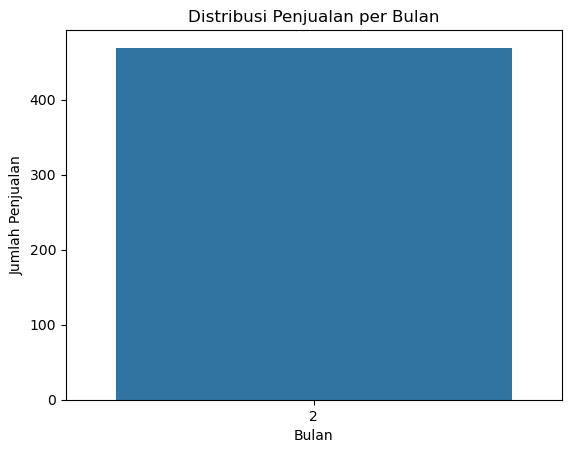

In [87]:
print("\nDistribusi Penjualan per Bulan:")
sns.countplot(x='BULAN', data=df_jual)
plt.title('Distribusi Penjualan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penjualan')
plt.show()

In [88]:
label_encoder = LabelEncoder()
df_jual['KODE'] = label_encoder.fit_transform(df_jual['KODE'])
df_jual['NAMA BARANG'] = label_encoder.fit_transform(df_jual['NAMA BARANG'])

In [89]:
X = df_jual[['KODE', 'BULAN']]
y = df_jual['NAMA BARANG']


In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [91]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [92]:
y_pred = model.predict(X_test)

In [97]:
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAkurasi Model: {accuracy}')
print('\nMatriks Kebingungan:')
print(confusion_matrix(y_test, y_pred))
print('\nLaporan Klasifikasi:')
print(classification_report(y_test, y_pred))



Akurasi Model: 0.41134751773049644

Matriks Kebingungan:
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  7  0  0]
 [ 0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0 13  0  0]
 [ 0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  

C:\Users\azriel17\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\azriel17\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\azriel17\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


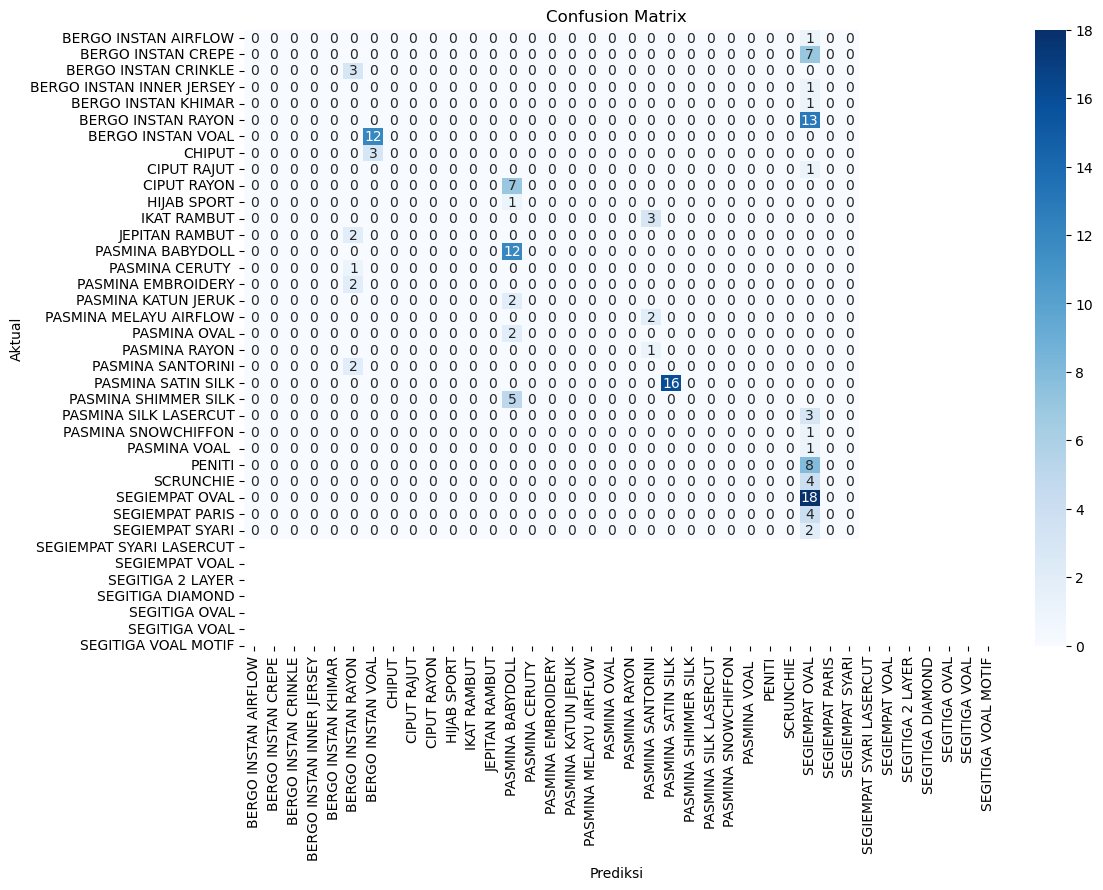

In [98]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

In [99]:
next_month = 3
df_next_month = df_jual[['KODE']].drop_duplicates()
df_next_month['BULAN'] = next_month

In [100]:
pred_next_month = model.predict(df_next_month[['KODE', 'BULAN']])
df_next_month['PREDIKSI'] = pred_next_month
df_next_month['PREDIKSI'] = label_encoder.inverse_transform(df_next_month['PREDIKSI'])

In [101]:
print("\nPrediksi Barang Terlaris Bulan Depan:")
print(df_next_month)


Prediksi Barang Terlaris Bulan Depan:
     KODE  BULAN           PREDIKSI
1       7      3       PASMINA OVAL
2      30      3  BERGO INSTAN VOAL
3      27      3  BERGO INSTAN VOAL
4      11      3       PASMINA OVAL
5      10      3       PASMINA OVAL
6      20      3      PASMINA VOAL 
8      34      3  BERGO INSTAN VOAL
10     36      3   SEGITIGA DIAMOND
11     17      3      PASMINA VOAL 
12     35      3   SEGITIGA DIAMOND
17      0      3             PENITI
18      1      3             CHIPUT
19     25      3      PASMINA VOAL 
24      3      3             CHIPUT
29     24      3      PASMINA VOAL 
31      5      3       PASMINA OVAL
33     15      3       PASMINA OVAL
34      8      3       PASMINA OVAL
36     28      3  BERGO INSTAN VOAL
67     12      3       PASMINA OVAL
70     22      3      PASMINA VOAL 
78     31      3  BERGO INSTAN VOAL
80      2      3             CHIPUT
85      4      3             CHIPUT
91     19      3      PASMINA VOAL 
92     23      3      PAS

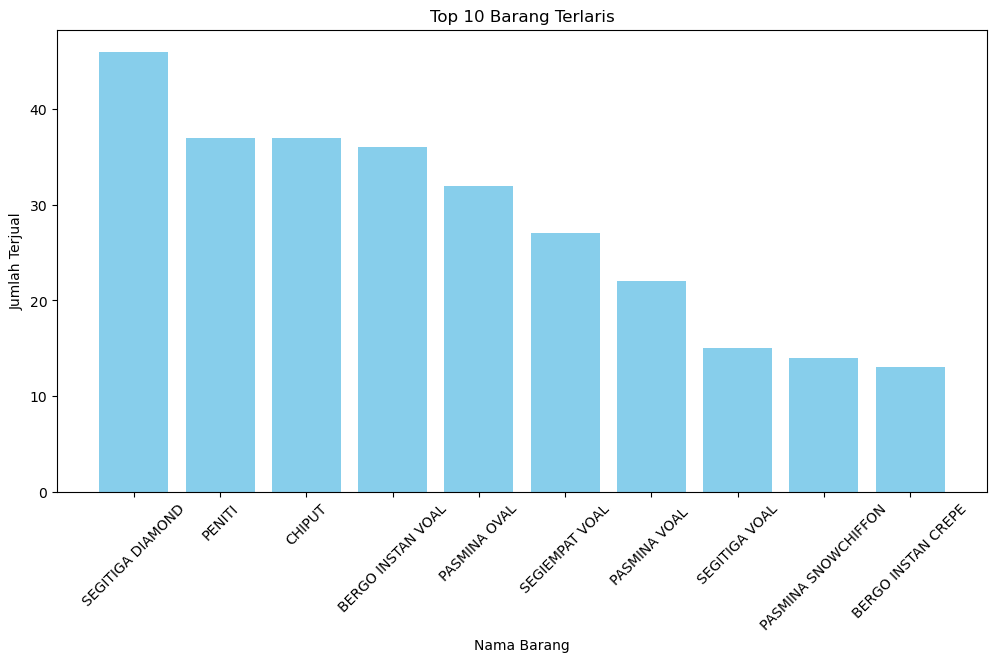

In [102]:
plt.figure(figsize=(12, 6))
plt.bar(top_10_laris['NAMA BARANG'], top_10_laris['COUNT'], color='skyblue')
plt.xlabel('Nama Barang')
plt.ylabel('Jumlah Terjual')
plt.title('Top 10 Barang Terlaris')
plt.xticks(rotation=45)
plt.show()

In [103]:
pred_top_items = df_next_month.groupby('PREDIKSI').size().reset_index(name='COUNT')
pred_top_items = pred_top_items.sort_values(by='COUNT', ascending=False).head(10)

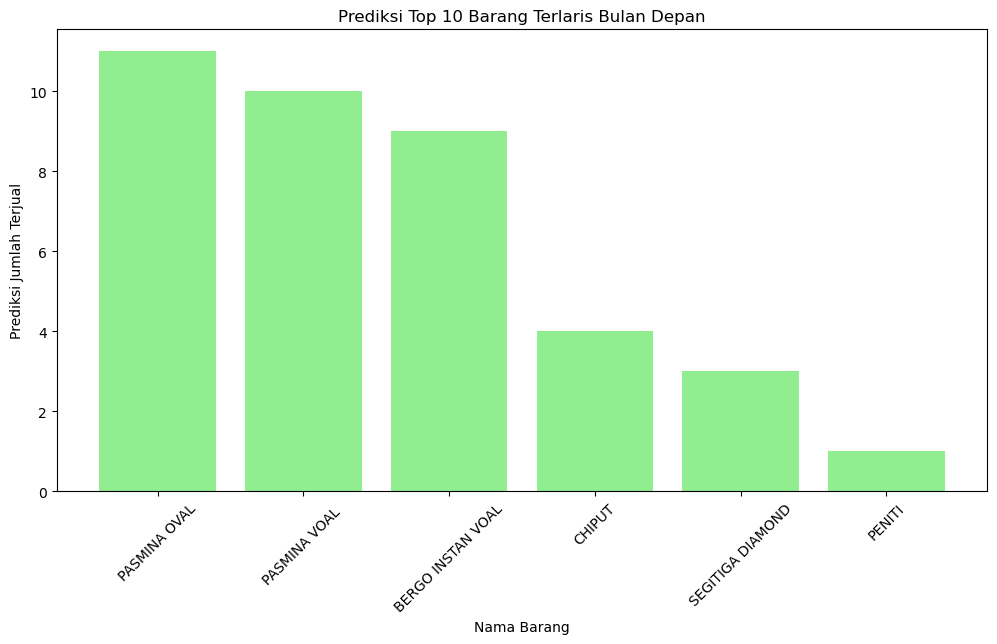

In [104]:
plt.figure(figsize=(12, 6))
plt.bar(pred_top_items['PREDIKSI'], pred_top_items['COUNT'], color='lightgreen')
plt.xlabel('Nama Barang')
plt.ylabel('Prediksi Jumlah Terjual')
plt.title('Prediksi Top 10 Barang Terlaris Bulan Depan')
plt.xticks(rotation=45)
plt.show()